# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Brooke Paykin

**ID**: BSP67 | 5163658

> **Due Date**
>
> Friday, 9/8/23, 9:00pm

## Overview

### Instructions

-   Problems 1-3 consist of a series of code snippets for you to
    interpret and debug. For Problems 1 and 2, you will be asked to
    identify relevant error(s) and fix the code. For Problem 3, the code
    works as intended; your goal is to identify the code’s purpose by
    following its logic.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [2]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/github-classroom/BEE4750-FA23/hw01-bsp67`


In [3]:
using Plots
using GraphRecipes
using LaTeXStrings

## Problems (Total: 40 Points)

### Problem 1 (8 points)

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [4]:
array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
array_values[1]

89

In [5]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 (3 points)

Describe the logic error.

The logic error is that the setup assumes that there is a value in the array that is smaller than 0. By setting the inital minimum value to 0, the prompt is assuming that the array contains a value that is less than or equal to 0. Since the given array_values does not contain values that are less than 0, the function mistakenly believes that 0 is the minimum value in the array.

#### Problem 1.2 (3 points)

Write a fixed version of the function.

In [6]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

minimum (generic function with 1 method)

#### Problem 1.3 (2 points)

Use your fixed function to find the minimum value of `array_values`.

In [7]:
array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
minimum(array_values)

78

### Problem 2 (8 points)

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [2]:
import Statistics.mean

In [6]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

#### Problem 2.1 (3 points)

Describe the logic and/or syntax error.

The error is due to the @show average_grade; the variable average_grade is defined inside the function. After the function ends (which is where the variable average_grade existed), the code then says to show the average_grade. since the average_grade only existed within the function, this does not work and you get an error message that average_grade is undefined. It is a scoping issue. 

Another issues is that the function  tries to call the variable student_grades in line 3 "average_grade = mean(student_grade), when that was created outside of the function and is a global variable. The code should have instead included the parameter, grades, in the parenthesis, so that the function is referencing something it has defined.  

Additionally, the mean function is not working because I need to import it from the statistics module. 

#### Problem 2.2 (3 points)

Write a fixed version of the code.

In [15]:
import Statistics.mean

function class_average(grades)
  average_grade = mean(grades)
  return average_grade
  @show average_grade;
end



class_average (generic function with 1 method)

#### Problem 2.3 (2 points)

Use your fixed code to compute the average grade for the class.

In [17]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
class_average(student_grades)



94.4

### Problem 3 (8 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [5]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]

#### Problem 3.1 (4 points)

Explain the purpose of `mystery_function`.

it will create a creates a new string that contains all values of the user inputed string ONE TIME. 

the mysetery function requires the user to input an array of numbers. 

if this user inputted array, values, does not have any duplicates, then the mysetery function will return the a new array that is identical to the original one given. 

If this user inputted array, values, does have duplicates, then the numbers in the new array, y, will be in the same order as the user inputed values. HOWEVER, only the first instance of each value will be included in the new string, y. It will create a creates a new string that contains all values of the user inputed string one time.  It will not allow duplciates. Only the first occurance of each number will be concacted to the new string, y, thus preserving the order of first instances and not allowing for duplicates 

#### Problem 3.2 (4 points)

Add comments to the code, explaining why and how it works. Refer to
[“Best Practices for Writing Code
Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
and remember that bad comments can be just as bad as no comments at all.
You do not need to add comments to every line (in fact, this is very bad
practice), but you should note the *purpose* of every “section” of code,
and add comments explaining any code sequences that you don’t
immediately understand.

In [18]:
function mystery_function(values) #values is a array of numbers
    y = [] #create a blank list
    for v in values #loop through every element in array values
        if !(v in y) #if the element is not already in y, append it to y
            append!(y, v)
        end
    end
    return y #return y, which is a new array that appends each unqiue element 
    #that was in the array values as they
    #appeared (ie: if values = [3,3,5,3] becomes then y =[3,5])
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


### Problem 4 (16 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

#### Problem 4.1 (3 points)

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

In [13]:
using Pkg
Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/github-classroom/BEE4750-FA23/hw01-bsp67/Project.toml`
    Updating `~/github-classroom/BEE4750-FA23/hw01-bsp67/Manifest.toml`


  [44cfe95a] ↑ Pkg v1.9.0 ⇒ v1.9.2
  [e66e0078] ↑ CompilerSupportLibraries_jll v1.0.2+0 ⇒ v1.0.5+0


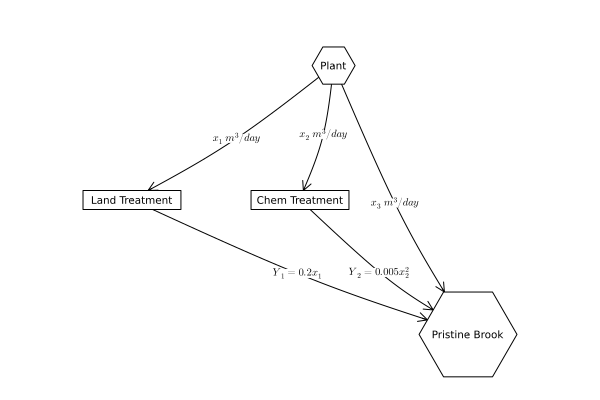

In [37]:
using GraphRecipes, Plots, LaTeXStrings

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"x_1 \ m^3/day", (1,3) => L"x_2 \ m^3/day", (1, 4) => L"x_3 \ m^3/day",(2, 4) => L"Y_1 = 0.2x_1",(3, 4) => L"Y_2=0.005x_2^2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)

#### Problem 4.2 (4 points)

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).


The water can be discharged into the river using any combination of land treatment, chemical treatment, and untreated water. The goal is for the YUK levels to be below 20 kg/day using a combination of the available methods (land, chemical, or no treatment).

Since the company will continue to release 100 m^3/day of wastewater, the sum of x_1, x_2, and x_3 must add up to 100 m^3/day. Thus the quanities for x_1, x_2, and x_3 can be anywhere between 0 and 100, inclusive. 

The total cost is the sum of the land treatment costs and the chemical treatment costs. There would be no additional cost the untreated water. Since the land treatment cost x_1^2/20 dollars per day and the chemical treatment costs 1.5 * x_2 dollars per day, the total cost of treatment will be the sum of those: x_1^2/20 + 1.5 * x_2

To compute the total YUK levels, I will reference the equations I came up with in the drawing above. For land, 0.2*x_1 yields the kg/day of YUK. For the chemical, 0.005x_2^2 reveals the YUK in kg/day. For untreated wastewater, it is simply x_3. Thus the total YUK level in the brook will be the sum of all three which is 0.2*x_1 +0.005x_2^2 + x_3

Now we must consider if this YUK level is acceptable by the government. To do so, we will see if the total YUK level is less than or equal to 20 kg/day. If it is below or equal to, then it is acceptable. 

We will return to the user the YUK level and cost for their respective treatment plan. 

#### Problem 4.3 (4 points)

Implement this systems model as a Julia function which computes the
resulting YUK concentration and cost for a particular treatment plan.
You can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [7]:
function multiple_return_values(x, y)
    return (x+y, x*y)
end

a, b = multiple_return_values(2, 5)
@show a;
@show b;

a = 7
b = 10

In [ ]:
function costandamounts(x_1, x_2, x_3) 
    #x_1 is volume of wastewater that will go to land treatment in m^3/day (must be between 0 and 100)
    #x_2 is volume of wastewater that will go to chemical treatment in m^3/day (must be between 0 and 100)
    #x_3 is volume of wastewater that will untreated into the brook in m^3/day (must be between 0 and 100)
    @assert 0 <= x_1 <=100
    @assert 0 <= x_2 <=100
    @assert 0 <= x_3 <=100
    #make sure the the wastewater discharged from the factory is still 100 m^3/day total
    @assert x_1+x_2+x_3 == 100

    originalx = 100 #total volume of wastewater produced per day in m^3/day that is dicharged into the brook
    orginaly = 100 #total # of kg originally dumped in the brook daily

    maxdischarge = 20 #max mass of YUK allowed to be in the brook kg/day

    costperday = x_1^2/20 + 1.5*x_2
    dischargeperday = 0.2*x_1 +0.005x_2^2 + x_3

    if dischargeperday > maxdischarge
        return "If $x_1 m^3/day goes to land treatment, $x_2 m^3/day goes to chemical treatment, " *
        "and $x_3 m^3/day is untreated, then the mass of YUK in the water is $dischargeperday " *
        "which exceeds the limit set by the EPA. The cost is $costperday dollars."
    elseif dischargeperday == maxdischarge
        return """
        If $x_1 m^3/day goes to land treatment, $x_2 m^3/day goes to chemical treatment, 
        and $x_3 m^3/day is untreated, then the mass of YUK in the water is $dischargeperday which is 
        equal to the limit set by the EPA. The cost is $costperday dollars."""
    else
        return """
        If $x_1 m^3/day goes to land treatment, $x_2 m^3/day goes to chemical treatment,
        and $x_3 m^3/day is untreated, then the mass of YUK in the water is $dischargeperday which is
        below the limit set by the EPA. The cost is $costperday dollars."""
    end
end

Make sure you comment your code appropriately to make it clear what is
going on and why.

#### Problem 4.4 (5 points)

Use your function to experiment with some different combinations of
wastewater discharge and treatment. Can you find one that satisfies the
YUK effluent standard? What was the cost? You don’t have to find an
“optimal” solution to this problem, but what do you think would be
needed to find a better solution?

In [69]:
costandamounts(60,40,2)

AssertionError: AssertionError: x_1 + x_2 + x_3 == 100

## References

List any external references consulted, including classmates.